In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot


In [2]:
data = pd.read_csv("50_Startups.csv")

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
data.shape

(50, 5)

In [7]:
data.duplicated().sum()

0

In [8]:
data.drop('State',axis=1,inplace = True)

In [9]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [10]:
# changing columns names
data.rename(columns ={"R&D Spend":"rd_spend",'Marketing Spend': "markenting_spend"}, inplace = True)

In [11]:
data.head()

,rd_spend,Administration,markenting_spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


{'whiskers': [<matplotlib.lines.Line2D at 0x7fb261d41550>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb261d41e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb261d412b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb26229a3a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb26229a730>],
 'means': []}

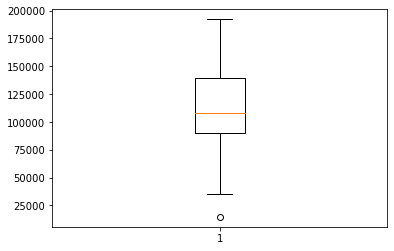

In [12]:
box = plt.boxplot(data['Profit'])
box

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb254650a00>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb254650fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb2546508b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb253dd4580>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb253dd4850>],
 'means': []}

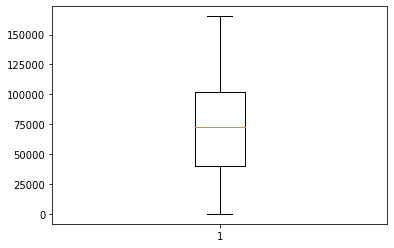

In [13]:
box1 = plt.boxplot(data['rd_spend'])
box1

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb26256e370>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb26233df10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb26256e6a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb2627f48b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb2627f4a30>],
 'means': []}

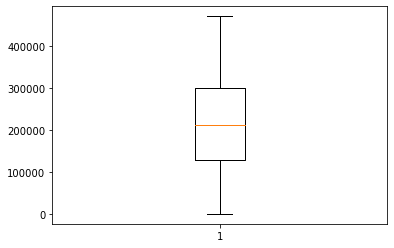

In [14]:
box2 = plt.boxplot(data['markenting_spend'])
box2

In [15]:
#we can use get_ydata of list comprehense method
[item.get_ydata() for item in box['fliers']]

[array([14681.4])]

In [16]:
data['Profit']<=14681.4

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49     True
Name: Profit, dtype: bool

In [17]:
data.drop(49,axis = 0, inplace = True)

In [18]:
data

,rd_spend,Administration,markenting_spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [20]:
data.corr()

,rd_spend,Administration,markenting_spend,Profit
rd_spend,1.000000,0.243438,0.711654,0.978437
Administration,0.243438,1.000000,-0.037280,0.205841
markenting_spend,0.711654,-0.037280,1.000000,0.739307
Profit,0.978437,0.205841,0.739307,1.000000


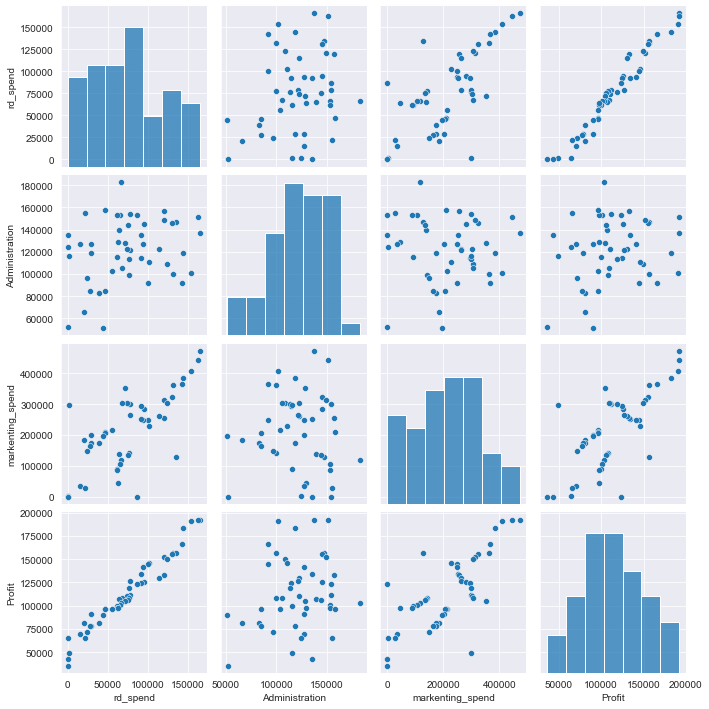

In [21]:
sns.set_style(style= 'darkgrid')
sns.pairplot(data)

In [24]:
model = sm.ols('Profit~rd_spend+Administration+markenting_spend',data= data).fit()

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           8.85e-32
Time:                        23:18:08   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
rd_spend             0.7830      0.038     20.470      0.000       0.706       0.860
Administration      -0.0222      0.043     -0.518      0.607      -0.109       0.064
markenting_spend     0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
# plot cooks distance 
model_influence = model.get_influence()
(c,_)= model_influence.cooks_distance
c

array([1.66350327e-03, 1.23799116e-02, 6.50218747e-02, 4.03899998e-02,
       1.28650631e-02, 1.21058543e-02, 2.73552112e-03, 3.61057988e-03,
       2.02797815e-04, 5.30263697e-03, 2.14218192e-02, 2.37342297e-02,
       1.58363724e-02, 5.22784116e-03, 8.43989066e-02, 4.65559091e-02,
       1.07193528e-02, 5.12051798e-03, 3.22585991e-03, 4.29215716e-02,
       3.40892355e-04, 1.88659002e-02, 5.25774010e-03, 8.63061914e-04,
       9.41132587e-03, 2.64353068e-03, 7.04291169e-03, 4.71293937e-02,
       4.68589970e-05, 1.23474983e-03, 1.33416709e-04, 8.33867345e-04,
       3.47851752e-03, 6.91264848e-04, 1.96199658e-02, 6.20542092e-03,
       6.41990558e-02, 5.15924382e-04, 5.90383781e-02, 5.21168130e-03,
       6.18372420e-04, 5.54615495e-04, 2.62020740e-04, 1.76373696e-02,
       1.77776263e-03, 9.79664450e-02, 1.39422650e-01, 2.47514796e-02,
       3.92744206e-01])

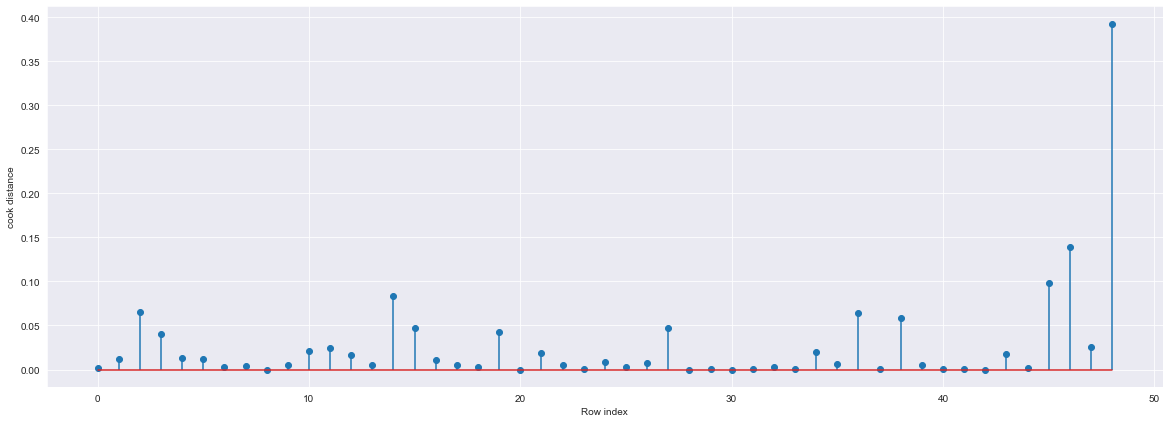

In [94]:
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(data)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel("cook distance")
plt.show()

In [95]:
(np.argmax(c),np.max(c))

(48, 0.39274420556321316)

In [96]:
data.drop(48,axis = 0,inplace = True)


In [98]:
data.head()

<bound method NDFrame.head of      rd_spend  Administration  markenting_spend     Profit
0   165349.20       136897.80         471784.10  192261.83
1   162597.70       151377.59         443898.53  191792.06
2   153441.51       101145.55         407934.54  191050.39
3   144372.41       118671.85         383199.62  182901.99
4   142107.34        91391.77         366168.42  166187.94
5   131876.90        99814.71         362861.36  156991.12
6   134615.46       147198.87         127716.82  156122.51
7   130298.13       145530.06         323876.68  155752.60
8   120542.52       148718.95         311613.29  152211.77
9   123334.88       108679.17         304981.62  149759.96
10  101913.08       110594.11         229160.95  146121.95
11  100671.96        91790.61         249744.55  144259.40
12   93863.75       127320.38         249839.44  141585.52
13   91992.39       135495.07         252664.93  134307.35
14  119943.24       156547.42         256512.92  132602.65
15  114523.61       122616

In [99]:
data.shape

(48, 4)

In [100]:
model1 = sm.ols("Profit~rd_spend+Administration+markenting_spend",data= data).fit()


In [101]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Sat, 03 Dec 2022   Prob (F-statistic):           2.03e-31
Time:                        20:44:02   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
rd_spend             0.7895      0.036     21.718      0.000       0.716       0.863
Administration      -0.0633      0.044     -1.442      0.156      -0.152       0.025
markenting_spend     0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""